In [1]:
# Setting the PythonPath
import os

# # Get the parent directory of the current working directory
parent_dir = os.path.dirname(os.getcwd())
if "changed" not in locals():
    changed = False

if not changed:
    os.chdir(parent_dir)
    changed = True
print(os.getcwd())

%load_ext autoreload
%autoreload 2

/home/local/USHERBROOKE/aara2601/projects/effective-efficient-qrc


## Data visualization

In [39]:
from src.viz.dataviz import DataVisualizer
from src.settings import STORAGE_PATH
from pathlib import Path

dataset_path = Path(os.path.join(STORAGE_PATH)) /'data'/'synthetic'/'varma'/"N=1024__w=25__d=3__s=100"

viz = DataVisualizer(
    dataset_path=data_path
).load()

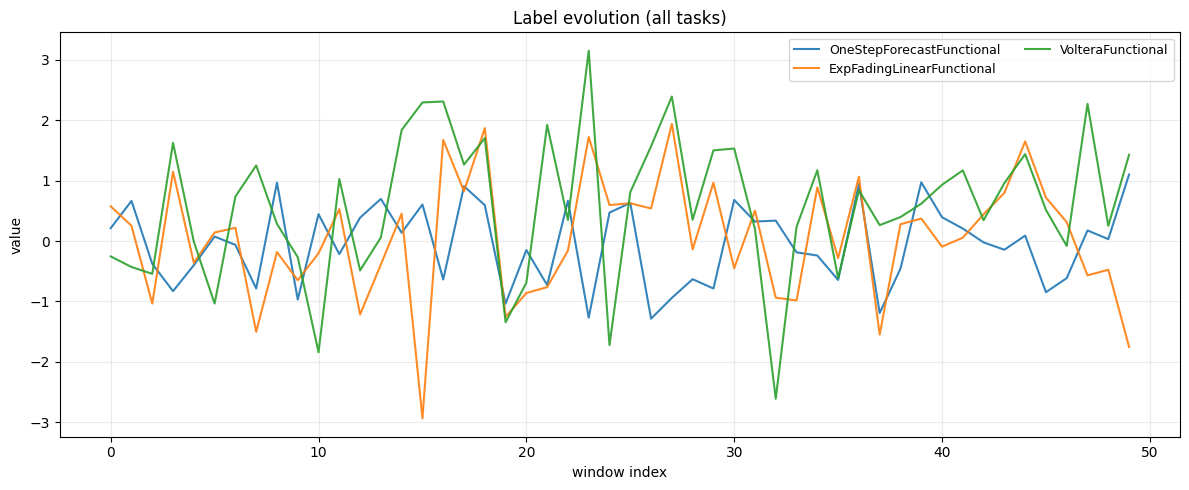

In [36]:
fig = viz.plot_tasks(
    task_indices=None,
    max_windows=50,
    select="first",
    x_axis="relative",
    input_summary="none",
    normalize="none",
)
fig.show()


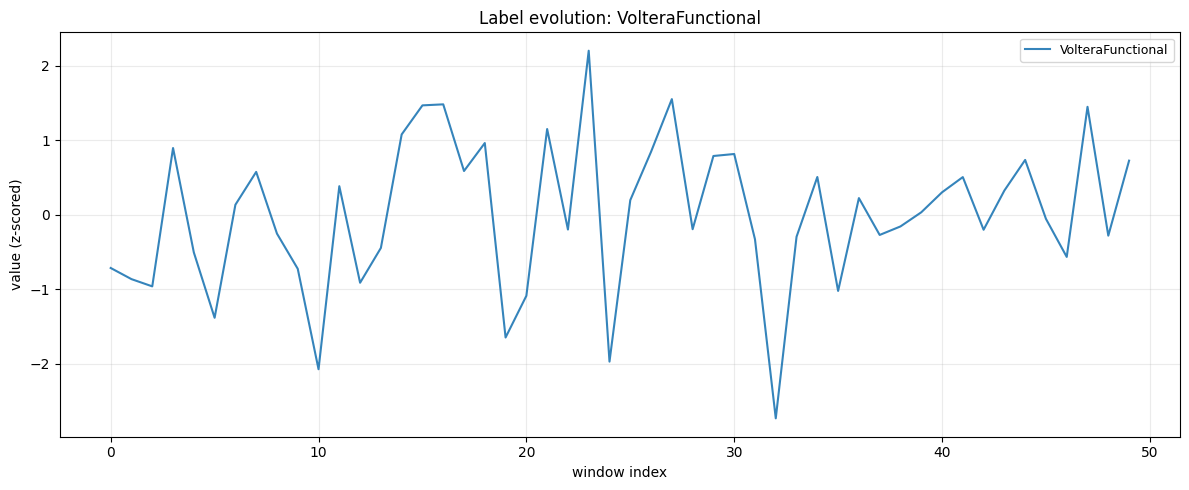

In [37]:
fig = viz.plot_tasks(
    task_indices=2,
    max_windows=50,
    select="first",
    x_axis="relative",
    input_summary="none",
)
fig.show()

## Predictions visualization

#### Load the experiment

In [40]:
import os
from pathlib import Path

import numpy as np
from omegaconf import OmegaConf

from src.settings import STORAGE_PATH
from src.experiment.experiment import Experiment

# --- dataset path (yours) ---
dataset_path = (
    Path(STORAGE_PATH)
    / "data" / "synthetic" / "varma"
    / "N=1024__w=25__d=3__s=100"
)

# --- run directory (the timestamped folder in your screenshot) ---
run_dir = (
    Path(STORAGE_PATH)
    / "results" / "reg_sweep" / "full"
    / "2026-01-29_22-19-24"
)

# 1) load hydra config used for that run (to reconstruct featurizer/model init)
cfg = OmegaConf.load(run_dir / ".hydra" / "config.yaml")

# 2) build Experiment with model instantiated from cfg
exp = Experiment.from_paths(
    dataset_path=dataset_path,
    model_cfg=cfg.model,                 # assumes top-level "model" in hydra config
    instantiate_functionals=True,
)

In [41]:
# 3) load trained model weights/arrays from disk and attach to exp
#    Keep the featurizer from cfg so you can call model.predict(X_new) if needed.
featurizer = getattr(exp.model, "featurizer", None)
exp.load_model(run_dir / "model", featurizer=featurizer)

,featurizer,QRCFeaturizer...fmp_kwargs={})
,standardize,True
,test_ratio,0.2
,split_seed,0
,tuning,{}


In [42]:
# 4) (optional) also reload the sweep results saved by your script
npz_path = run_dir / "reg_sweep.npz"
if npz_path.exists():
    z = np.load(npz_path, allow_pickle=False)
    exp.reg_sweep_ = {k: z[k] for k in z.files}

print("Loaded:", exp.dataset.X.shape, np.asarray(exp.dataset.y).shape)
print("Model has Phi_full_:", exp.model.Phi_full_ is not None)

Loaded: (1024, 25, 3) (3, 1024)
Model has Phi_full_: True


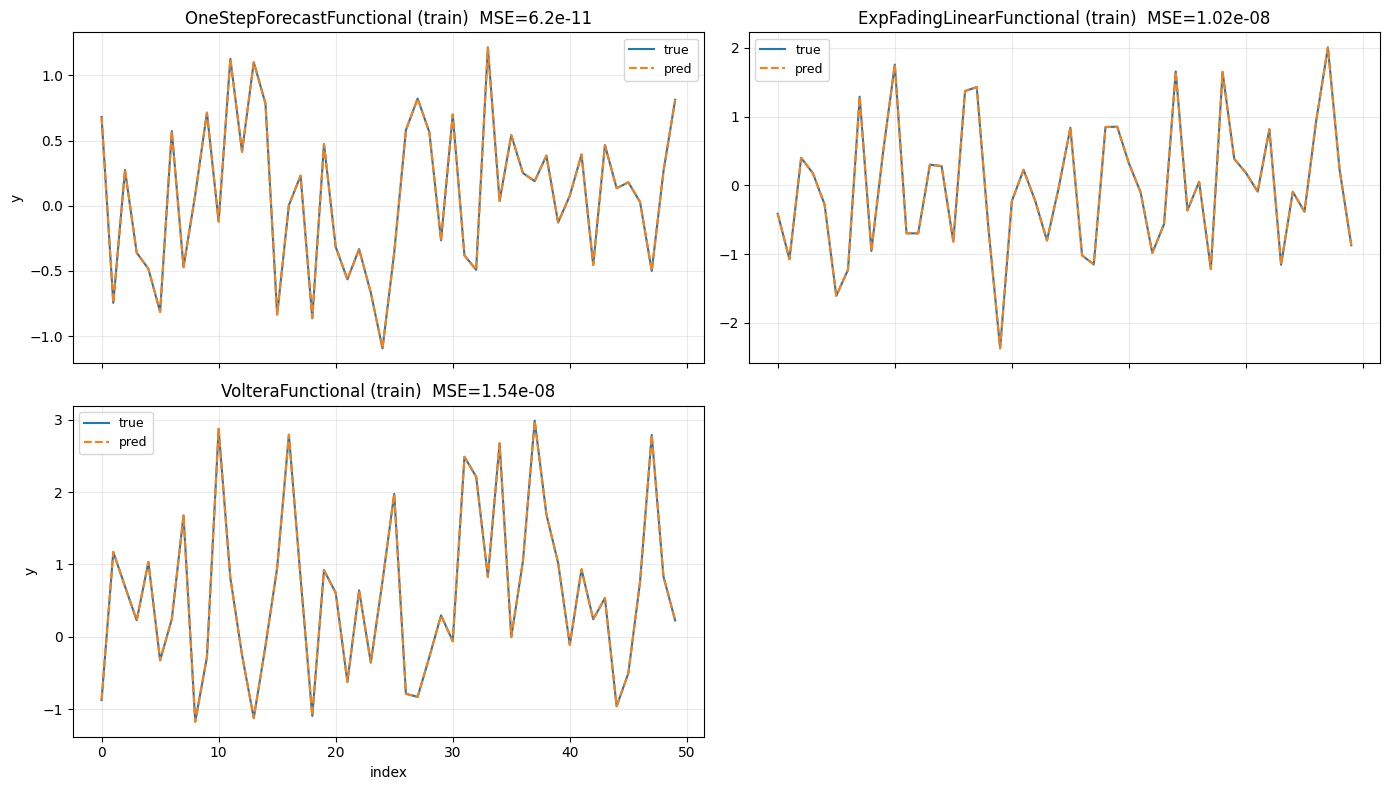

In [63]:
from src.viz.viz_pred import plot_true_vs_pred_grid

fig = plot_true_vs_pred_grid(exp, task_indices=[0,1,2], figsize=(14, 8), max_points=50, split="train")

fig.show()

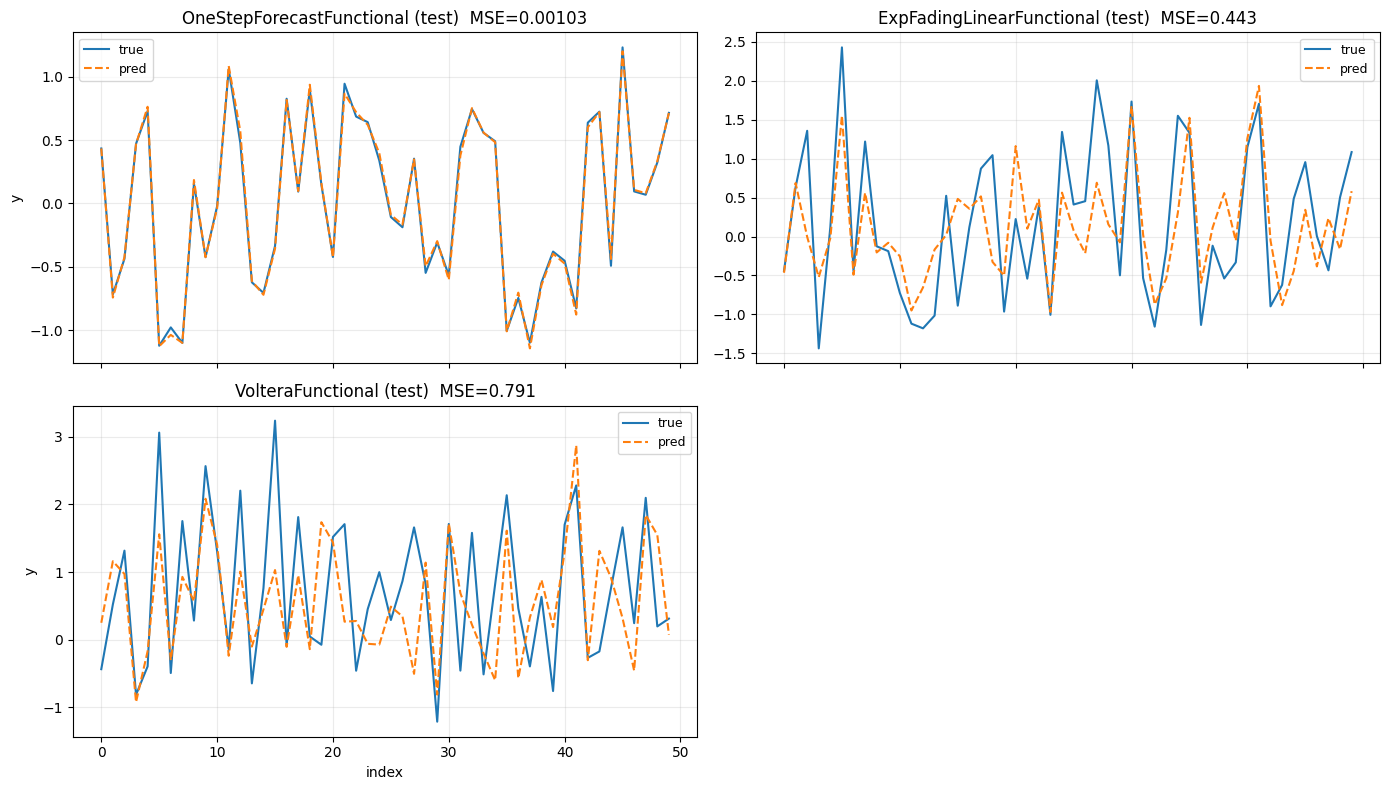

In [64]:
from src.viz.viz_pred import plot_true_vs_pred_grid

fig = plot_true_vs_pred_grid(exp, task_indices=[0,1,2], figsize=(14, 8), max_points=50, split="test")

fig.show()